# COMPONENTES CONECTADOS

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

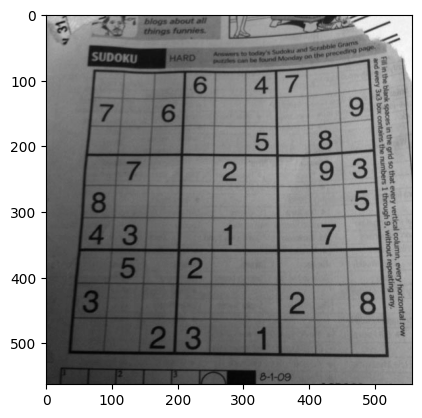

In [3]:
img = cv.imread('images/sudoku.png', 0)
plt.imshow(img, cmap='gray')

In [4]:
# COMPONENTES CONECTADOS
# en una imagen, un componenete es donde una region de pixeles conectados (adyacentes), tienen el mismo valor (img, binarias)
# los componentes conectados se pueden encontrar con 
# cv2.connectedComponents(), cv2.connectedComponentsWithStats(), cv2.connectedComponentsWithAlgorithm(), cv2.connectedComponentsWithStatsWithAlgorithm()
# usaremos: cv2.connectedComponentsWithStats()


## Umbralizacion global

Text(0.5, 1.0, '50.0')

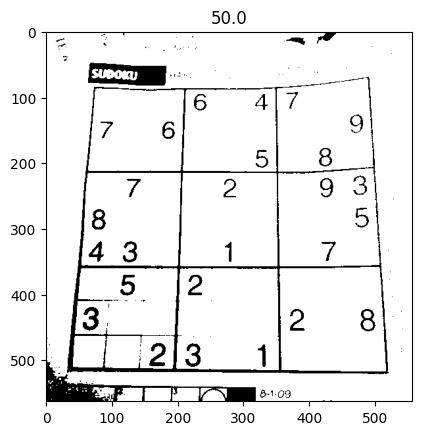

In [5]:
UMBRAL = 50
img_bin = cv.threshold(img, UMBRAL, 255, cv.THRESH_BINARY)
plt.imshow(img_bin[1], cmap='gray', vmin=0)
plt.title(f'{img_bin[0]}')

Text(0.5, 1.0, '50.0 vs 96.0')

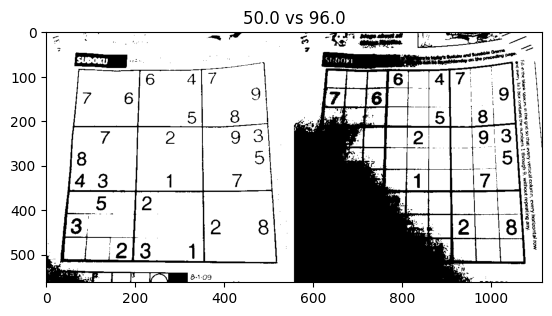

In [10]:
# umbralizacion otsu
UMBRAL = 0
img_bin_adap_mean = cv.threshold(img, UMBRAL, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)
plt.imshow(np.hstack([img_bin[1],img_bin_adap_mean[1]]), cmap='gray', vmin=0)
plt.title(f"{img_bin[0]} vs {img_bin_adap_mean[0]}")

## Umbralizacion adaptiva

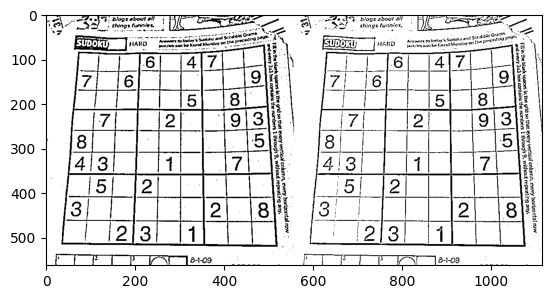

In [ ]:
# cv.ADAPTIVE_THRESH_MEAN_C(imagen, valor_maximo, metodo, umbral, tamaño_bloque, constante (se suma despues de la operacion))
# cv.ADAPTIVE_THRESH_GAUSSIAN_C

img_bin_adap_mean = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 9, 7)
img_bin_adap_gaus = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 9, 7)

plt.imshow(np.hstack([img_bin_adap_mean, img_bin_adap_gaus]), cmap='gray', vmin=0)


## Componentes conectados

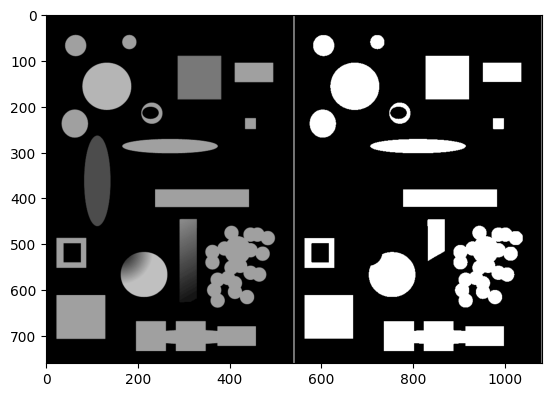

In [ ]:
img_blob = cv.imread('images/detect_blob.png', 0)
img_blob_bin = cv.threshold(img_blob, 0, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)[1]
plt.imshow(np.hstack([img_blob,img_blob_bin]), cmap='gray', vmin=0)

5577.117647058823
ancho = 541, alto = 760, area = 2059, centro = (270.0, 280.1554152501214)
ancho = 46, alto = 46, area = 1683, centro = (64.29411764705883, 68.1883541295306)
ancho = 31, alto = 31, area = 758, centro = (181.30079155672823, 60.62137203166227)
ancho = 95, alto = 95, area = 9025, centro = (334.0, 138.0)
ancho = 107, alto = 103, area = 8695, centro = (132.23070730304772, 156.93525014376078)
ancho = 84, alto = 42, area = 3528, centro = (453.5, 126.5)
ancho = 46, alto = 46, area = 938, centro = (232.72174840085287, 216.12473347547976)
ancho = 58, alto = 61, area = 2778, centro = (62.38624910007199, 238.12095032397409)
ancho = 24, alto = 24, area = 574, centro = (445.5, 238.45993031358884)
ancho = 209, alto = 31, area = 5145, centro = (270.06336248785226, 287.2139941690962)
ancho = 205, alto = 38, area = 7790, centro = (340.0, 400.5)
ancho = 38, alto = 91, area = 2982, centro = (309.09892689470155, 486.72099262240107)
ancho = 151, alto = 178, area = 15021, centro = (416.89934

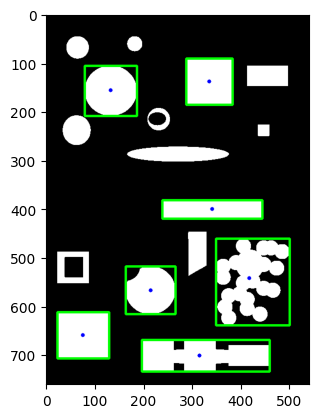

In [ ]:
# realizar análisis de componentes conectados a imagen binarizada
(numLabels, labels, stats, centroids) = cv.connectedComponentsWithStats(img_blob_bin)
# to rgb
output = cv.cvtColor(img_blob_bin.copy(), cv.COLOR_GRAY2RGB)

prom_area = np.mean(stats[1:, cv.CC_STAT_AREA])
print(prom_area)
   
# 0 es etiqueta del fondo
# recorrer el número de etiquetas únicas de componentes conectados
for i in range(1, numLabels):
    # extraer las estadísticas del componente conectado y el centroide para la etiqueta actual
    x = stats[i, cv.CC_STAT_LEFT]
    y = stats[i, cv.CC_STAT_TOP]
    w = stats[i, cv.CC_STAT_WIDTH]
    h = stats[i, cv.CC_STAT_HEIGHT]
    area = stats[i, cv.CC_STAT_AREA]
    (cX, cY) = centroids[i]

    print(f"ancho = {w}, alto = {h}, area = {area}, centro = ({cX}, {cY})")
    
    # clonar nuestra imagen original (para dibujar sobre ella) y luego dibujar el cuadro delimitador
    # rodeando el componente conectado junto con sus centroides como círculos
    # dibujar un cuadro delimitador rectangular para el componente conectado
    if area > prom_area:
        # solo punto y rectangulo a los mas grandes
         # dibujarlo en la imagen de salida        cv.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 3) # imagen a modificar, punto inicial, punto final, color bgr, grosor
        cv.circle(output, (int(cX), int(cY)), 4, (0, 0, 255), -1) # imagen a modificar, centro, radio, color bgr, grosor (-1 rellena)

plt.imshow(output, cmap='gray', vmin=0)
